In [40]:
import tensorflow as tf
from IPython.display import clear_output
import itertools, re, os, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from pylab import rcParams
from tensorflow.keras.models import Sequential, save_model

from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization, Input, concatenate, Reshape, Conv2DTranspose, Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras import layers, Input, Model, models, regularizers, optimizers

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

#from tensorflow.keras.utils import np_utils


from sklearn.utils import class_weight

import tensorflow_addons as tfa

from tensorflow.keras.layers import Conv1D, Convolution1D, MaxPooling1D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
import math

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.image as mpimg
import plotly.express as px
#from tensorflow.keras.utils.vis_utils import plot_model

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay


import math
import os
from tensorflow.keras import initializers
import gc
from random import randint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, Lambda
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU
from functools import partial
from tensorflow.keras.models import load_model

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.applications.resnet50 import ResNet50

def simp(x):
    return tf.keras.activations.sigmoid(x)

In [42]:
bce = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)
loss_obj = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)

In [43]:
def my_loss_fn(y_true, y_pred):

    y_true = tf.reshape(y_true, (-1,individual,individual,(((each_sizei*(sizei+5))+1))))
    y_pred = tf.reshape(y_pred, (-1,individual,individual,(((each_sizei*(sizei+5))+1))))
    
    conf_loss1 = tf.reduce_sum(tf.square(y_true[:,:,:,:1]-y_pred[:,:,:,:1]))
    conf_loss2 = tf.reduce_sum(tf.square(y_true[:,:,:,1:2]-y_pred[:,:,:,1:2]))
    conf_loss3 = tf.reduce_sum(tf.square(y_true[:,:,:,8:9]-y_pred[:,:,:,8:9]))
    conf_loss4 = tf.reduce_sum(tf.square(y_true[:,:,:,15:16]-y_pred[:,:,:,15:16]))
    conf_loss5 = tf.reduce_sum(tf.square(y_true[:,:,:,22:23]-y_pred[:,:,:,22:23]))
    conf_loss6 = tf.reduce_sum(tf.square(y_true[:,:,:,29:30]-y_pred[:,:,:,29:30]))
    conf_loss7 = tf.reduce_sum(tf.square(y_true[:,:,:,36:37]-y_pred[:,:,:,36:37]))
    conf_loss8 = tf.reduce_sum(tf.square(y_true[:,:,:,43:44]-y_pred[:,:,:,43:44]))
    
    conf_loss = conf_loss1+conf_loss2+conf_loss3+conf_loss4+conf_loss5+conf_loss6+conf_loss7+conf_loss8
    lodu_mask=tf.reshape(y_true[:,:,:,:1],(-1,individual,individual))
    modi_true = tf.boolean_mask(y_true[:,:,:,1:],lodu_mask)
    modi_pred = tf.boolean_mask(y_pred[:,:,:,1:],lodu_mask)
    modi_true = tf.reshape(modi_true,(-1,7,7))
    modi_pred = tf.reshape(modi_pred,(-1,7,7))
    
    modi_mask = tf.reshape(modi_true[:,:,:1],(-1,7))
    
    modi_class_true = tf.boolean_mask(modi_true[:,:,1:3],modi_mask)
    modi_class_pred = tf.boolean_mask(modi_pred[:,:,1:3],modi_mask)
    
    modi_box_true = tf.boolean_mask(modi_true[:,:,3:],modi_mask)
    modi_box_pred = tf.boolean_mask(modi_pred[:,:,3:],modi_mask)
    
    modi_class_true = tf.reshape(modi_class_true,(-1,2))
    modi_class_pred = tf.reshape(modi_class_pred,(-1,2))
    
    modi_box_true = tf.reshape(modi_box_true,(-1,4))
    modi_box_pred = tf.reshape(modi_box_pred,(-1,4))
    
    modi_class_pred = tf.nn.softmax(modi_class_pred)
    
    class_loss = tf.reduce_sum(loss_obj(modi_class_true, modi_class_pred))
    
    center_loss = tf.reduce_sum(tf.abs(modi_box_true[:,:2]-modi_box_pred[:,:2]))/batch_size
    
    box_loss = tf.reduce_sum(tf.abs(modi_box_true[:,2:]-modi_box_pred[:,2:]))
    area_loss = tf.reduce_sum(tf.abs(tf.math.multiply(modi_box_true[:,2:3],modi_box_true[:,3:]) - tf.math.multiply(modi_box_pred[:,2:3],modi_box_pred[:,3:])))
    
    iou_loss = cal_iou(modi_box_true,modi_box_pred)
    
    conf_loss = conf_loss/batch_size
    center_loss = center_loss/batch_size
    box_loss = box_loss/batch_size
    iou_loss = iou_loss/batch_size
    area_loss = area_loss/batch_size
    
    sumi = (2.0*conf_loss)+(2.0*class_loss)+(2.0*center_loss)+(3.0*box_loss) + (3.0*area_loss) +(3.0*iou_loss)
    return sumi

model = load_model('../input/yolo-model/best_model.h5',custom_objects={ 'my_loss_fn': my_loss_fn })
model.save('todel.h5')
gkjlgk

In [44]:
a=tf.constant([[0.0,0.0,1.0],[1.0,0.0,0.0]])
b=tf.constant([[0.1,0.4,0.6],[0.5,0.3,0.3]])
b = tf.nn.softmax(b)
cce = tf.keras.losses.CategoricalCrossentropy()
cce(a, b)

<tf.Tensor: shape=(), dtype=float32, numpy=0.927878>

pretrained_model = tf.keras.applications.ResNet50(input_shape=(image_size, image_size, 3),include_top=False,weights='imagenet',pooling='max')
pretrained_model = Model(inputs=pretrained_model.inputs, outputs=pretrained_model.layers[-2].output)
pretrained_model.summary()

In [45]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
user_credential = user_secrets.get_gcloud_credential()
user_secrets.set_tensorflow_credential(user_credential)

In [46]:
# BigQuery
from google.cloud import bigquery
bigquery_client = bigquery.Client(project='YOUR PROJECT ID')

# Cloud Storage
from google.cloud import storage
storage_client = storage.Client(project='YOUR PROJECT ID')

# Cloud AutoML
from google.cloud import automl_v1beta1 as automl
automl_client = automl.AutoMlClient()

# Cloud Translation
from google.cloud import translate_v2
translate_client = translate_v2.Client()

# Cloud Natural Language
from google.cloud import language_v1
client = language_v1.LanguageServiceClient()

# Cloud Video Intelligence
from google.cloud import videointelligence
video_client = videointelligence.VideoIntelligenceServiceClient()

# Cloud Vision
from google.cloud import vision
client = vision.ImageAnnotatorClient()

In [47]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    print("Device:", tpu.master())
    strategy = tf.distribute.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print("Number of replicas:", strategy.num_replicas_in_sync)

2021-11-24 11:59:33.432033: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job worker -> {0 -> 10.0.0.2:8470}
2021-11-24 11:59:33.432233: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job localhost -> {0 -> localhost:30063}
2021-11-24 11:59:33.434422: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job worker -> {0 -> 10.0.0.2:8470}
2021-11-24 11:59:33.434699: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job localhost -> {0 -> localhost:30063}


Device: grpc://10.0.0.2:8470
Number of replicas: 8


In [48]:
batch_size=64
image_size=512
sizei=2
each_sizei=7
total_sizei=25
channels_size=3
global extreme
individual=5


# p=pd.read_csv('../input/hatworkers/Self Driving Car.v3-fixed-small.darknet/export/_darknet.labels', header=None)
# d={}
# for i in range(len(p)):
#     d[i]=p[0][i]
    
global no_of_anchors,no_of_classes,threshold, thresh_iou,max_box
no_of_anchors=each_sizei
no_of_classes=sizei
threshold=0.6
threshold_iou=0.3
max_box=10
global lodu
global dick
lodu = tf.zeros([individual,])

In [49]:
def yolo_filter_boxes(boxes, box_confidence, box_class_probs, threshold):
    box_class_probs = tf.nn.softmax(box_class_probs)
    box_scores = box_confidence*box_class_probs
    box_classes = tf.math.argmax(box_scores,axis=-1)
    box_class_scores = tf.reduce_max(box_scores,keepdims=False, axis=-1)
    filtering_mask = box_class_scores>=threshold
    scores = tf.boolean_mask(box_class_scores,filtering_mask)
    boxes = tf.boolean_mask(boxes,filtering_mask)
    classes = tf.boolean_mask(box_classes,filtering_mask)
    return scores, boxes, classes


def iou(box1, box2):
    (box1_x1, box1_y1, box1_x2, box1_y2) = box1
    (box2_x1, box2_y1, box2_x2, box2_y2) = box2
    xi1 = max(box1_x1,box2_x1)
    yi1 = max(box1_y1,box2_y1)
    xi2 = min(box1_x2,box2_x2)
    yi2 = min(box1_y2,box2_y2)
    inter_width = max(xi2-xi1,0)
    inter_height = max(yi2-yi1,0)
    inter_area = inter_width*inter_height
    box1_area = abs(box1_x2-box1_x1)*abs(box1_y2-box1_y1)
    box2_area = abs(box2_x2-box2_x1)*abs(box2_y2-box2_y1)
    union_area = box1_area+box2_area-inter_area
    iou = inter_area/union_area
    return iou

def yolo_non_max_suppression(scores, boxes, classes, max_boxes, iou_threshold):
    max_boxes_tensor = tf.Variable(max_boxes, dtype='int32')
    nms_indices = tf.image.non_max_suppression(boxes,scores,max_boxes,iou_threshold=iou_threshold,name=None)
    scores = tf.gather(scores, nms_indices, validate_indices=None, axis=None, batch_dims=0, name=None)
    boxes = tf.gather(boxes, nms_indices, validate_indices=None, axis=None, batch_dims=0, name=None)
    classes = tf.gather(classes, nms_indices, validate_indices=None, axis=None, batch_dims=0, name=None)
    return scores, boxes, classes

def yolo_boxes_to_corners(box_xy, box_wh):
    box_mins = box_xy - (box_wh / 2.)
    box_maxes = box_xy + (box_wh / 2.)
    return tf.keras.backend.concatenate([
        box_mins[:,:,:,:,1:2],  # y_min
        box_mins[:,:,:,:,0:1],  # x_min
        box_maxes[:,:,:,:,1:2],  # y_max
        box_maxes[:,:,:,:,0:1]  # x_max
    ])

def yolo_head(x):
    boxes_=x[:,:,:,:,sizei+1:]
    box_wh=x[:,:,:,:,3+sizei:]
    box_xy=x[:,:,:,:,1+sizei:3+sizei]
    confidence_=x[:,:,:,:,:1]
    classes_=x[:,:,:,:,1:sizei+1]
    boxes_ = yolo_boxes_to_corners(box_xy,box_wh)
    scores,boxes,classes=yolo_filter_boxes(boxes_,confidence_,classes_,threshold)
    scores,boxes,classes=yolo_non_max_suppression(scores,boxes,classes,max_box,threshold_iou)
    return scores, boxes, classes

def yolo_boxer_to_corners(box_xy, box_wh):
    box_mins = box_xy - (box_wh / 2.)
    box_maxes = box_xy + (box_wh / 2.)
    return tf.keras.backend.concatenate([
        box_mins[:,0:1],  # y_min
        box_mins[:,1:2],  # x_min
        box_maxes[:,0:1],  # y_max
        box_maxes[:,1:2]  # x_max
    ])

def kali_iou(box1, box2):
    (box1_x1, box1_y1, box1_x2, box1_y2) = box1[:,:1],box1[:,1:2],box1[:,2:3],box1[:,3:4]
    (box2_x1, box2_y1, box2_x2, box2_y2) = box2[:,:1],box2[:,1:2],box2[:,2:3],box2[:,3:4]
    xi1 = tf.math.maximum(box1_x1,box2_x1)
    yi1 = tf.math.maximum(box1_y1,box2_y1)
    xi2 = tf.math.minimum(box1_x2,box2_x2)
    yi2 = tf.math.minimum(box1_y2,box2_y2)
    inter_width = tf.math.maximum(xi2-xi1,0)
    inter_height = tf.math.maximum(yi2-yi1,0)
    inter_area = inter_width*inter_height
    box1_area = tf.math.abs(box1_x2-box1_x1)*tf.math.abs(box1_y2-box1_y1)
    box2_area = tf.math.abs(box2_x2-box2_x1)*tf.math.abs(box2_y2-box2_y1)
    union_area = box1_area+box2_area-inter_area
    iou = inter_area/union_area
    return iou


def cal_iou(original,pred):
    box_wh = original[:,2:]
    box_wh_pred = pred[:,2:]
    box_xy = original[:,:2]
    box_xy_pred = pred[:,:2]
    boxes_original = yolo_boxer_to_corners(box_xy,box_wh)
    boxes_pred = yolo_boxer_to_corners(box_xy_pred,box_wh_pred)
    score = kali_iou(boxes_original,boxes_pred)
    usei = tf.ones_like(score)
    return tf.reduce_sum(bce(score, usei))

**masks**

In [50]:
import os
from kaggle_datasets import KaggleDatasets
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

plt.style.use('ggplot')

IMAGE_SIZE = [512, 512]

In [51]:
GCS_PATH = KaggleDatasets().get_gcs_path()

In [52]:
FILENAMES = tf.io.gfile.glob(GCS_PATH + "/tfrecords/*.tfrec")
split_ind = int(0.9 * len(FILENAMES))
TRAINING_FILENAMES, VALID_FILENAMES = FILENAMES[:split_ind], FILENAMES[split_ind:]
print("Train TFRecord Files:", len(TRAINING_FILENAMES))
print("Validation TFRecord Files:", len(VALID_FILENAMES))

Train TFRecord Files: 9
Validation TFRecord Files: 1


In [53]:
def parse_tfrecord_fn(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "label": tf.io.VarLenFeature(tf.float32)
    }
    example = tf.io.parse_single_example(example, feature_description)
    example["image"] = tf.io.decode_jpeg(example["image"], channels=3)
    example["label"] = tf.sparse.to_dense(example["label"])
    return example


def prepare_sample(features):
    image = tf.image.resize(features["image"], size=(512, 512))
    return image, features["label"]


def get_dataset(filenames, batch_size):
    dataset = (
        tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTOTUNE)
        .map(parse_tfrecord_fn, num_parallel_calls=AUTOTUNE)
        .map(prepare_sample, num_parallel_calls=AUTOTUNE)
        .map(data_augment, num_parallel_calls=AUTOTUNE)
        .shuffle(batch_size * 10)
        .batch(batch_size)
        .prefetch(AUTOTUNE)
    )
    return dataset


AUTOTUNE = tf.data.experimental.AUTOTUNE

def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)


def data_augment(image, label):
    # data augmentation. Thanks to the dataset.prefetch(AUTO) statement in the next function (below),
    # this happens essentially for free on TPU. Data pipeline code is executed on the "CPU" part
    # of the TPU while the TPU itself is computing gradients.
    image = tf.image.random_saturation(image, 0, 2)
    image=tf.image.random_brightness(image, 0.1)
    return image, label  

In [54]:
STEPS_PER_EPOCH = count_data_items(TRAINING_FILENAMES)// batch_size
VALIDATION_STEPS = -(-count_data_items(VALID_FILENAMES) // batch_size)

1250
label: [0. 0. 0. ... 0. 0. 0.]
Image shape: (512, 512, 3)


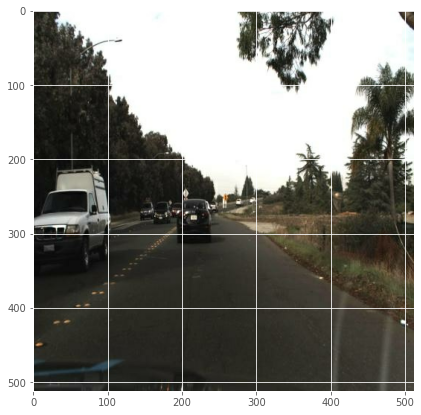

2021-11-24 11:59:43.770061: W ./tensorflow/core/distributed_runtime/eager/destroy_tensor_handle_node.h:57] Ignoring an error encountered when deleting remote tensors handles: Invalid argument: Unable to find the relevant tensor remote_handle: Op ID: 21563, Output num: 0
Additional GRPC error information from remote target /job:worker/replica:0/task:0:
:{"created":"@1637755183.770008810","description":"Error received from peer ipv4:10.0.0.2:8470","file":"external/com_github_grpc_grpc/src/core/lib/surface/call.cc","file_line":1056,"grpc_message":"Unable to find the relevant tensor remote_handle: Op ID: 21563, Output num: 0","grpc_status":3}


In [55]:
tfrecords_dir = GCS_PATH+'/tfrecords'
num_samples=2980
raw_dataset = tf.data.TFRecordDataset(f"{tfrecords_dir}/file_00-{num_samples}.tfrec")
parsed_dataset = raw_dataset.map(parse_tfrecord_fn)


for features in parsed_dataset.take(1):
    for key in features.keys():
        if key != "image":
            print(len(features[key]))
            print(f"{key}: {features[key]}")

    print(f"Image shape: {features['image'].shape}")
    plt.figure(figsize=(7, 7))
    plt.imshow(features["image"].numpy())
    plt.show()

In [56]:
def draw_boxes(image_file, out_boxes, out_classes, out_scores):
    import matplotlib.pyplot as plt
    from matplotlib.patches import Rectangle
    from PIL import Image
    xt = pd.DataFrame(out_boxes.numpy(), columns = ['y1', 'x1', 'y2', 'x2'])
    xt=xt*512
    xt['scores']=out_scores.numpy()
    xt['label']=out_classes.numpy()
    xt['w'] = (xt['x2'] - xt['x1']).abs()
    xt['h'] = (xt['y2'] - xt['y1']).abs()
    
    xt['x']=(xt['x1']+ (xt['w']*0.5))
    xt['y']=(xt['y1']+ (xt['h']*0.5))
    plt.imshow(Image.open(image_file))
    plt.grid(True)
    for i in range(len(xt)):
        x=xt.iloc[i:i+1,:]
        x1=x['x1'].values
        y1=x['y1'].values
        w=x['w'].values
        h=x['h'].values
        la=x['label'].values
        lb=x['scores'].values
        x2=x['x'].values
        y2=x['y'].values
        color_of_box=color_box[la[0]][0]
        color_of_label=color_box[la[0]][1]
        legend_properties = {'weight':'bold'}
        la=d[la[0]]
        lb = str(round(lb[0], 2))
        la = la + ' ('+lb+') '
        text_x=x1
        text_y=y1
        plt.gca().add_patch(Rectangle((x1, y1), w, h, linewidth=1, edgecolor=color_of_box, facecolor='none',lw=1.3))
        plt.plot(x2, y2, marker='.', color="white")
        plt.text(text_x, text_y, lb, fontsize=9, color=color_of_label)
        plt.legend(prop=legend_properties)

In [57]:
def predict(image_file,fj):
    #image, image_data = preprocess_image("images/" + image_file, model_image_size = (608, 608))
    from tensorflow.keras.models import load_model
    import matplotlib.pyplot as plt
    path='../input/fork-of-yolo-tpu/best_model.h5'
    modeli = load_model(path, compile=False)
    from keras.preprocessing import image
    img = image.load_img(image_file, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    a=modeli.predict(x)
    a=tf.reshape(a,(1,individual,individual,((each_sizei*(sizei+5))+1)))
    a=a[:,:,:,1:]
    a=tf.reshape(a,(1,individual,individual,each_sizei,sizei+5))
    
    a=tf.reshape(fj,(1,individual,individual,((each_sizei*(sizei+5))+1)))
    a=a[:,:,:,1:]
    a=tf.reshape(a,(1,individual,individual,each_sizei,sizei+5))
    out_scores, out_boxes, out_classes=yolo_head(a)
    draw_boxes(image_file,out_boxes,out_classes,out_scores)

    return out_scores, out_boxes, out_classes

In [58]:
def get_class_names(out_classes):
    x=out_classes.numpy()

In [59]:
total_req=(sizei+5)*each_sizei*total_sizei
print(total_req)

1225


a=tf.random.uniform((19,5), minval=0, maxval=1, dtype=tf.dtypes.float32, seed=None, name=None)
b=tf.random.uniform((19,5), minval=0, maxval=1, dtype=tf.dtypes.float32, seed=None, name=None)
print(a)
print('\n')
print(b)
print('\n')
my_loss_fn(a,b)

In [60]:
def create_model():
    encoder_input = layers.Input(shape=(image_size, image_size, channels_size), name="original_img")
    pretrained_model = tf.keras.applications.ResNet50(input_shape=(image_size, image_size, 3),include_top=False,weights='imagenet',pooling='max')
    pretrained_model = Model(inputs=pretrained_model.inputs, outputs=pretrained_model.layers[-2].output)
    pretrained_model.trainable = False
    for layer in pretrained_model.layers[len(pretrained_model.layers)-5:]:
        layer.trainable = True
    x=pretrained_model(encoder_input)
    x=layers.BatchNormalization()(x)
    x = Conv2D(512, (7,7), strides=(1,1), padding='valid', name='conv_third_last',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros', activation='relu')(x)
    x=layers.Dropout(0.2)(x)
    x=layers.BatchNormalization()(x)
    x = Conv2D(128, (7,7), strides=(1,1), padding='valid', name='conv_second_last', use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros', activation='relu')(x)
    x=layers.Dropout(0.1)(x)
    x=layers.BatchNormalization()(x)
    x = Conv2D(64, (3,3), strides=(1,1), padding='same', use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros', name='conv_last1',activation='relu')(x)
    x=layers.Dropout(0.1)(x)
    x=layers.BatchNormalization()(x)
    x = Conv2D(15, (3,3), strides=(1,1), padding='valid', use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros', name='conv_last')(x)
    x=layers.Dropout(0.1)(x)
    x=layers.BatchNormalization()(x)
    x=layers.Flatten()(x)
    encoder_output=layers.Dense(1250, activation='linear',kernel_initializer='glorot_uniform',bias_initializer='zeros')(x)
    encoder = Model(encoder_input, encoder_output, name="encoder")
    opt = tf.keras.optimizers.Adam(learning_rate=0.03)
    encoder.compile(optimizer='adam',loss=my_loss_fn)
    return encoder

In [61]:
train=get_dataset(TRAINING_FILENAMES, batch_size).repeat()
valid=get_dataset(VALID_FILENAMES, batch_size).repeat()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True, patience=15)
model = make_yolo(512,4096)

history = model.fit(
    x=get_dataset(VALID_FILENAMES,batch_size),
    epochs=10,
    steps_per_epoch=VALIDATION_STEPS,
    validation_data=get_dataset(TRAINING_FILENAMES, batch_size),
    validation_steps=STEPS_PER_EPOCH,
    callbacks=[es, mc],
    verbose=1
)


In [62]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True, patience=200)

# model = load_model('./todel.h5',custom_objects={ 'my_loss_fn': my_loss_fn })

with strategy.scope():
#     model = load_model('./todel.h5',custom_objects={ 'my_loss_fn': my_loss_fn })
    model = create_model()

history = model.fit(
    train,
    epochs=200,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=valid,
    validation_steps=VALIDATION_STEPS,
    callbacks=[es, mc],
    verbose=1
)


Epoch 1/200
419/419 [==============================] - 83s 150ms/step - loss: 53.1583 - val_loss: 41.2219

Epoch 00001: val_loss improved from inf to 41.22188, saving model to best_model.h5
Epoch 2/200
419/419 [==============================] - 53s 126ms/step - loss: 38.7728 - val_loss: 37.4967

Epoch 00002: val_loss improved from 41.22188 to 37.49673, saving model to best_model.h5
Epoch 3/200
419/419 [==============================] - 53s 126ms/step - loss: 34.4963 - val_loss: 34.9274

Epoch 00003: val_loss improved from 37.49673 to 34.92736, saving model to best_model.h5
Epoch 4/200
419/419 [==============================] - 52s 124ms/step - loss: 32.5314 - val_loss: 33.3371

Epoch 00004: val_loss improved from 34.92736 to 33.33714, saving model to best_model.h5
Epoch 5/200
419/419 [==============================] - 53s 126ms/step - loss: 30.9651 - val_loss: 32.3001

Epoch 00005: val_loss improved from 33.33714 to 32.30007, saving model to best_model.h5
Epoch 6/200
419/419 [=========

model=create_model()
tf.keras.utils.plot_model(model, to_file='Model1.png')
#model=tf.keras.models.load_model('../input/model-weights/best_model.h5')
#model.summary()

In [ ]:
history = model.fit(
    train,
    epochs=300,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=valid,
    validation_steps=VALIDATION_STEPS,
    callbacks=[es, mc],
    verbose=1
)

Epoch 1/300
419/419 [==============================] - 53s 125ms/step - loss: 15.8666 - val_loss: 16.7907

Epoch 00001: val_loss did not improve from 16.60023
Epoch 2/300
419/419 [==============================] - 52s 125ms/step - loss: 15.8405 - val_loss: 16.5365

Epoch 00002: val_loss improved from 16.60023 to 16.53646, saving model to best_model.h5
Epoch 3/300
419/419 [==============================] - 52s 125ms/step - loss: 15.8239 - val_loss: 16.5087

Epoch 00003: val_loss improved from 16.53646 to 16.50865, saving model to best_model.h5
Epoch 4/300
419/419 [==============================] - 52s 124ms/step - loss: 15.8236 - val_loss: 16.5384

Epoch 00004: val_loss did not improve from 16.50865
Epoch 5/300
419/419 [==============================] - 52s 125ms/step - loss: 15.8141 - val_loss: 16.6488

Epoch 00005: val_loss did not improve from 16.50865
Epoch 6/300
419/419 [==============================] - 53s 126ms/step - loss: 15.8158 - val_loss: 16.5921

Epoch 00006: val_loss did 

def read_this(file):
    file_name=os.path.splitext(file)[0]+'.txt'
    path_csv = pd.read_csv(file_name, sep=" ", header=None)
    path_csv.columns=['label','x','y','w','h']
    return path_csv

read_this('../input/hatworkers/Self Driving Car.v3-fixed-small.darknet/export/1478019974679051391_jpg.rf.2cfb16685f4b257e8dcd0ee6514c0ff6.jpg')